In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1) / 255.0 #2차원으로 쓰고 채널차원(색)을 추가
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape =(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

keras.utils.plot_model(model,show_shapes=True,to_file='cnn_architecture.png',dpi=300)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics= 'accuracy')
#조기종료 설정
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_cnn_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target),callbacks=(checkpoint_cb,early_stopping_cb))

Epoch 1/20
1500/1500 [==============================] - 9s 5ms/step - loss: 0.5378 - accuracy: 0.8082 - val_loss: 0.3409 - val_accuracy: 0.8727
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3516 - accuracy: 0.8751 - val_loss: 0.2752 - val_accuracy: 0.8972
Epoch 3/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2996 - accuracy: 0.8924 - val_loss: 0.2453 - val_accuracy: 0.9084
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2677 - accuracy: 0.9044 - val_loss: 0.2483 - val_accuracy: 0.9051
Epoch 5/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2432 - accuracy: 0.9110 - val_loss: 0.2393 - val_accuracy: 0.9125
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2233 - accuracy: 0.9189 - val_loss: 0.2307 - val_accuracy: 0.9174
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2047 - accuracy: 0.9243 - val_loss: 0.2253 - val_accuracy:

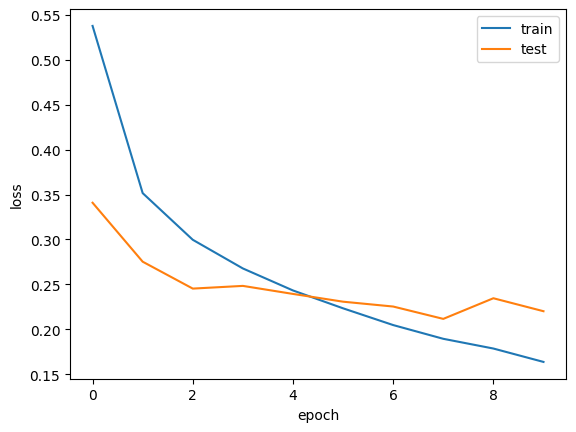

In [4]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

375/375 [==============================] - 1s 3ms/step - loss: 0.2116 - accuracy: 0.9243


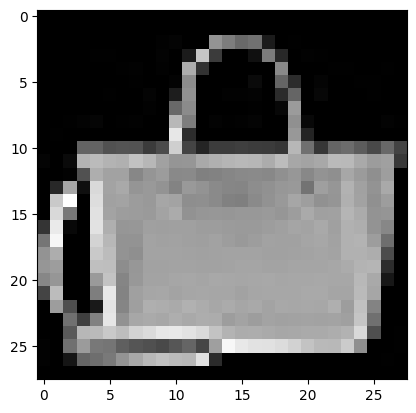

1/1 [==============================] - 0s 214ms/step
[[5.8151332e-15 1.9943538e-28 2.2935697e-21 3.6270084e-19 3.3165066e-18
  6.7917220e-19 1.7223015e-18 7.7859546e-17 1.0000000e+00 1.9131057e-14]]
313/313 [==============================] - 1s 4ms/step - loss: 32.9074 - accuracy: 0.8879


[32.90739440917969, 0.8878999948501587]

In [5]:
model.evaluate(val_scaled,val_target)
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray')
plt.show()

preds = model.predict(val_scaled[0:1])
print(preds)

model.evaluate(test_input,test_target)

In [6]:
model = keras.models.load_model('best_cnn_model.h5')
model.layers

(3, 3, 1, 32) (32,)
(3, 3, 1, 32)


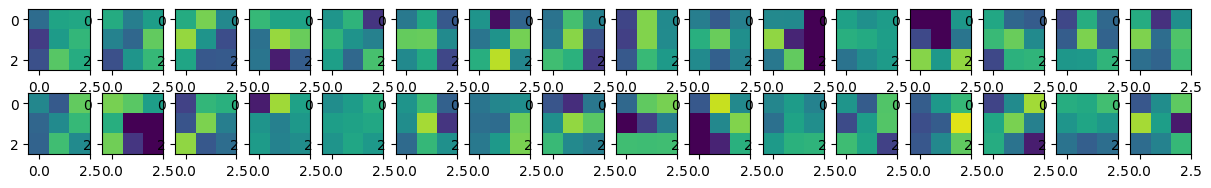

In [30]:
#훈련된 모델의 kernel
conv = model.layers[0]
print(conv.weights[0].shape,conv.weights[1].shape)
conv_weights = conv.weights[0].numpy()
print(conv.weights[0].shape)

fig,axis = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axis[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
plt.show()

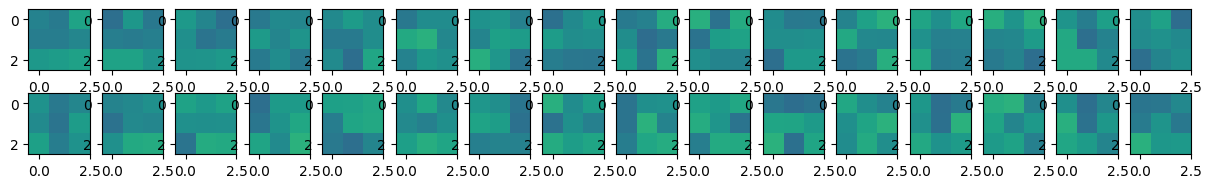

In [13]:
#훈련되지 않은 모델의 kernel
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
no_training_conv = no_training_model.layers[0]
no_training_conv_weights = no_training_conv.weights[0].numpy()
fig,axis = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axis[i,j].imshow(no_training_conv_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
plt.show()

1/1 [==============================] - 0s 47ms/step
(1, 28, 28, 32)


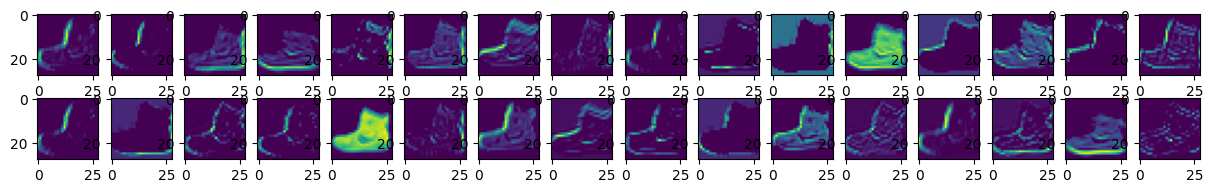

In [21]:
conv_acti=keras.models.Model(model.input,model.layers[0].output)
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

fig,axis = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axis[i,j].imshow(feature_maps[0,:,:,i*16+j])
plt.show()

In [1]:
conv2_acti=keras.models.Model(model.input,model.layers[2].output)#0번이 conv2d 1번이 풀링층 2번이 conv2d
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps2 = conv2_acti.predict(inputs)
print(feature_maps2.shape)

fig,axis = plt.subplots(4,16,figsize=(15,2))
for i in range(4):
  for j in range(16):
    axis[i,j].imshow(feature_maps2[0,:,:,i*16+j])
plt.show()

NameError: name 'keras' is not defined